## Import libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## Get dataframe and columns

In [37]:
df = pd.read_csv('../dataset/KAG_energydata_complete.csv')

In [27]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
df.head()

## Time series Analysis

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

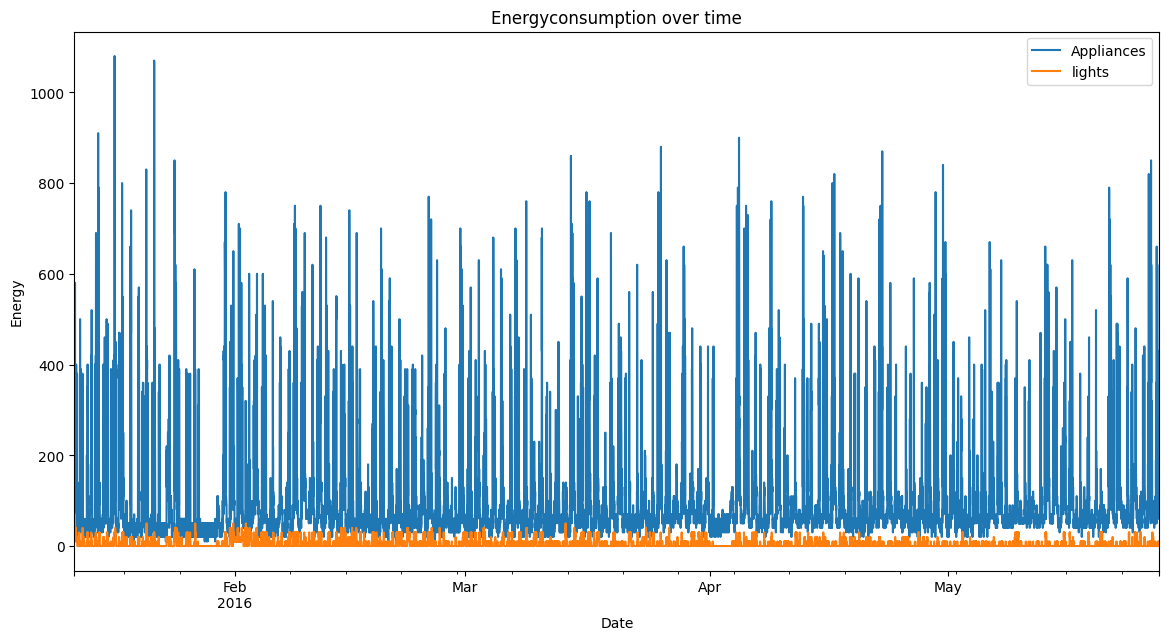

In [ ]:
df[['Appliances','lights']].plot(figsize=(14, 7))
plt.title('Energyconsumption over time')
plt.xlabel('Date')
plt.ylabel('Energy')
plt.show()

## Create a correlation matrix

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x: x.timestamp())

In [16]:
corr_matrix = df.corr()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
treshold = 0.85

In [23]:
corr_matrix_filtered = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

In [24]:
high_corr_pairs = corr_matrix_filtered.stack().reset_index()
high_corr_pairs.columns = ['feature1', 'feature2', 'correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['correlation'].abs() > treshold]

In [25]:
print("Pairs of features with correlation above 0.85")
print(high_corr_pairs)

Pairs of features with correlation above 0.85
    feature1 feature2  correlation
24        T3       T1     0.892402
39        T4       T1     0.877001
43        T4       T3     0.852778
49      RH_4     RH_1     0.880359
53      RH_4     RH_3     0.898978
58        T5       T1     0.885247
62        T5       T3     0.888169
64        T5       T4     0.871813
114       T7       T4     0.877763
116       T7       T5     0.870624
130     RH_7     RH_4     0.894301
151       T8       T7     0.882123
169     RH_8     RH_7     0.883984
171       T9     date     0.888546
178       T9       T3     0.901324
180       T9       T4     0.889439
182       T9       T5     0.911055
186       T9       T7     0.944776
188       T9       T8     0.869338
200     RH_9     RH_4     0.856591
206     RH_9     RH_7     0.858686
208     RH_9     RH_8     0.855812
223    T_out       T6     0.974787
405      rv2      rv1     1.000000


## Do kmeans clustering

In [32]:
data = df[['Appliances', 'lights']]

In [33]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

df['Cluster'] = clusters

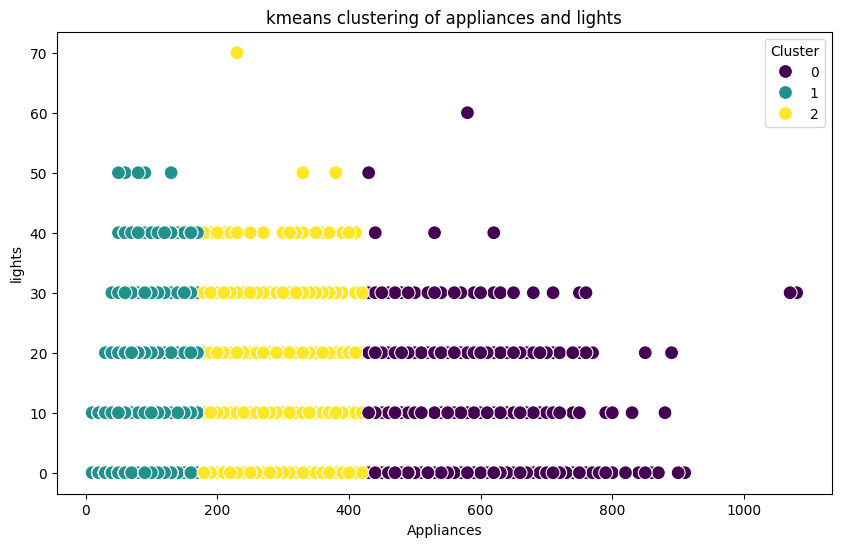

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x='Appliances', y='lights', hue='Cluster', palette='viridis', s=100)
plt.title('kmeans clustering of appliances and lights')
plt.xlabel('Appliances')
plt.ylabel('lights')
plt.legend(title='Cluster')
plt.show()